<a href="https://colab.research.google.com/github/rasmipaul/ENews_Express/blob/main/ENews_Express_Learner_Notebook_Full_Code_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 16.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.
arviz 0.22.0 requires matp

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
files.download('/content/ENews_Express_Learner_Notebook_Full_Code (1).ipynb')


Mounted at /content/drive


FileNotFoundError: Cannot find file: /content/ENews_Express_Learner_Notebook_Full_Code (1).ipynb

## Reading the Data into a DataFrame

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/abtest.csv')

# Preview the first 5 rows
print(df.head())

   user_id      group landing_page  time_spent_on_the_page converted  \
0   546592    control          old                    3.48        no   
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
3   546567    control          old                    3.02        no   
4   546459  treatment          new                    4.75       yes   

  language_preferred  
0            Spanish  
1            English  
2            Spanish  
3             French  
4            Spanish  


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

Shape of dataset: (100, 6)

Data Types:
 user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                   int64
language_preferred         object
dtype: object

Missing values:
 user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Summary statistics:
               user_id    group landing_page  time_spent_on_the_page  \
count      100.000000      100          100              100.000000   
unique            NaN        2            2                     NaN   
top               NaN  control          old                     NaN   
freq              NaN       50           50                     NaN   
mean    546517.000000      NaN          NaN                5.377800   
std         52.295779      NaN          NaN                2.378166   
min     546443.000000  

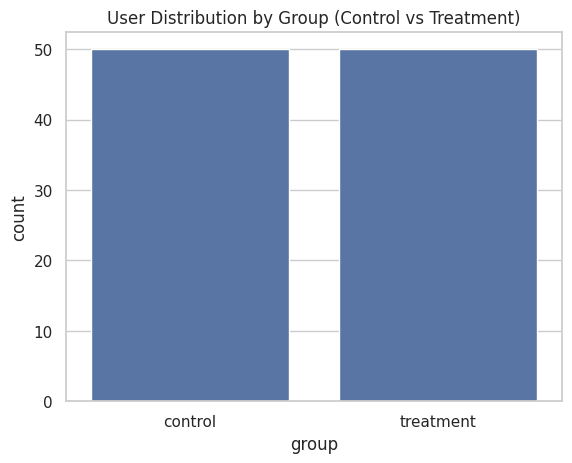

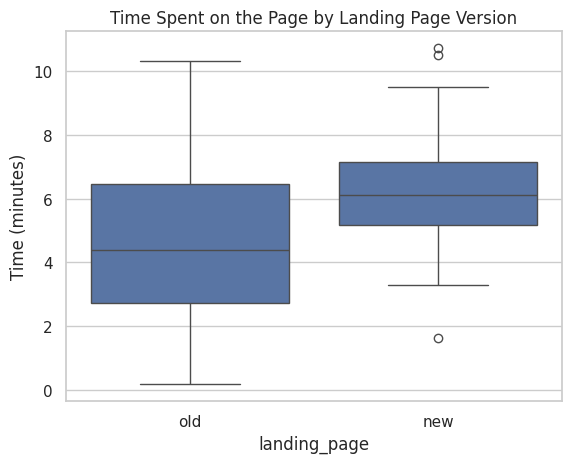


Conversion Rate by Landing Page:
 landing_page
new    0.66
old    0.42
Name: converted, dtype: float64


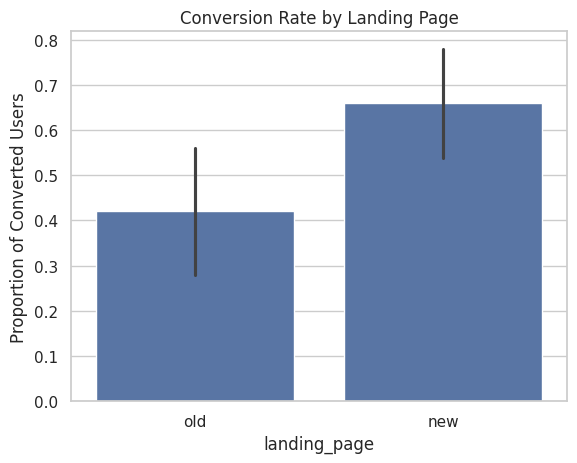

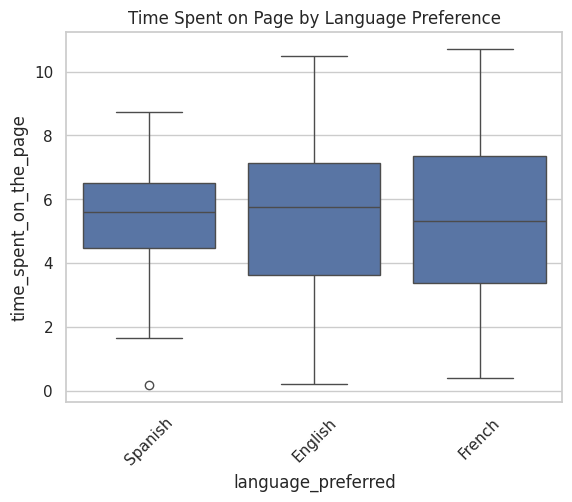

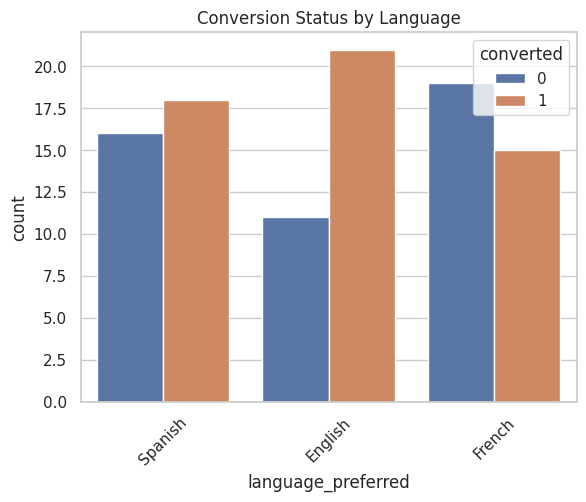

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set visualization style
sns.set(style="whitegrid")

# Step 2: Load the data
df = pd.read_csv("/content/sample_data/abtest.csv")

# Convert 'converted' column to numerical
df['converted'] = df['converted'].apply(lambda x: 1 if x == 'yes' else 0)

# Step 3: Basic Info
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe(include='all'))

# Step 4: Unique values in categorical columns
print("\nUnique values in 'group':", df['group'].unique())
print("Unique values in 'landing_page':", df['landing_page'].unique())
print("Unique values in 'converted':", df['converted'].unique())
print("Unique values in 'language_preferred':", df['language_preferred'].unique())

# Step 5: Visualize group sizes
sns.countplot(data=df, x='group')
plt.title("User Distribution by Group (Control vs Treatment)")
plt.show()

# Step 6: Compare time spent on the page by landing page
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.title("Time Spent on the Page by Landing Page Version")
plt.ylabel("Time (minutes)")
plt.show()

# Step 7: Conversion rate by landing page
conversion_rate = df.groupby('landing_page')['converted'].mean()
print("\nConversion Rate by Landing Page:\n", conversion_rate)

sns.barplot(data=df, x='landing_page', y='converted')
plt.title("Conversion Rate by Landing Page")
plt.ylabel("Proportion of Converted Users")
plt.show()

# Step 8: Time spent across different languages
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.title("Time Spent on Page by Language Preference")
plt.xticks(rotation=45)
plt.show()

# Step 9: Conversion by language
sns.countplot(data=df, x='language_preferred', hue='converted')
plt.title("Conversion Status by Language")
plt.xticks(rotation=45)
plt.show()

### Univariate Analysis

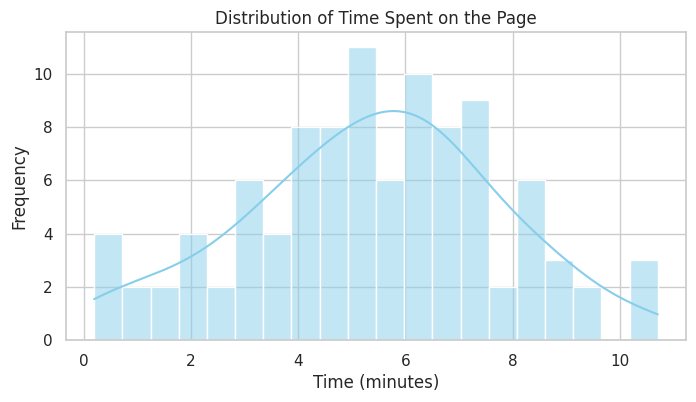

Summary statistics for time_spent_on_the_page:
count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64


/tmp/ipython-input-11-53777429.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='group', data=df, palette='Set2')


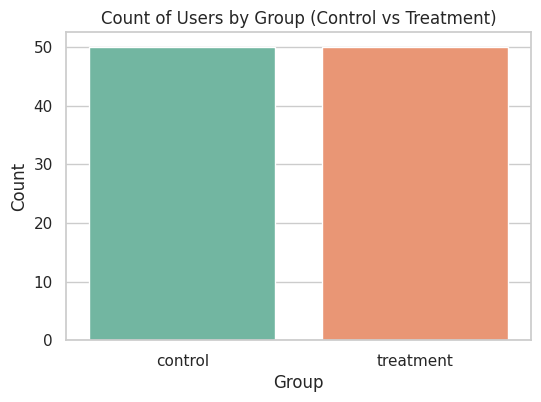

/tmp/ipython-input-11-53777429.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='landing_page', data=df, palette='Set3')


Value counts for group:
group
control      50
treatment    50
Name: count, dtype: int64


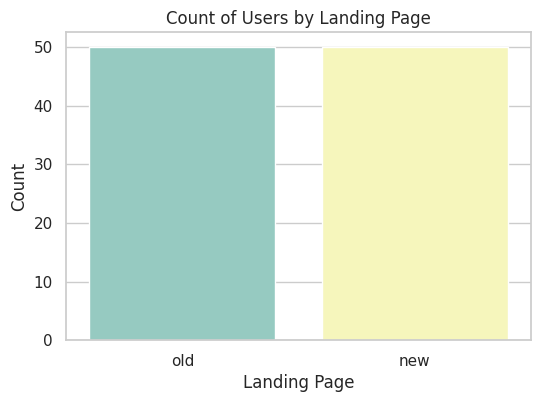

/tmp/ipython-input-11-53777429.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='converted', data=df, palette='coolwarm')


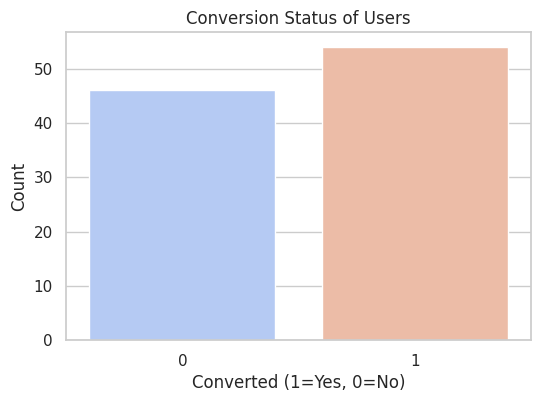

/tmp/ipython-input-11-53777429.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='language_preferred', data=df, palette='pastel')



Overall Conversion Rate: 54.00%


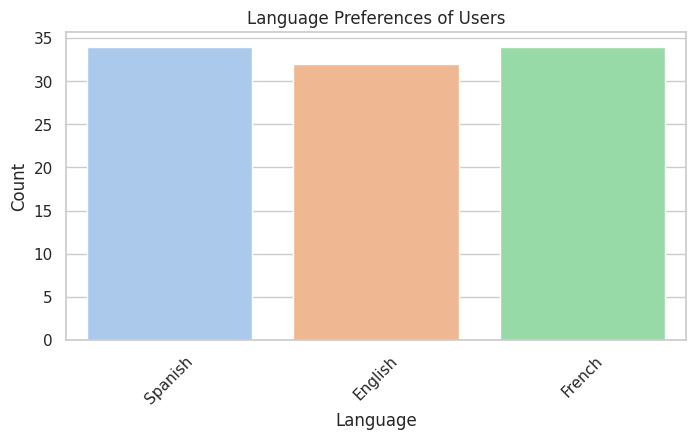


Language preference distribution:
language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64


In [ ]:
# Load the dataset
df = pd.read_csv('/content/sample_data/abtest.csv')

# Convert 'converted' column to numerical (1 for 'yes', 0 for 'no')
df['converted'] = df['converted'].apply(lambda x: 1 if x == 'yes' else 0)

# Set plot style
sns.set(style="whitegrid")

# --- 1. Numerical Variable: time_spent_on_the_page ---
plt.figure(figsize=(8, 4))
sns.histplot(df['time_spent_on_the_page'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Time Spent on the Page")
plt.xlabel("Time (minutes)")
plt.ylabel("Frequency")
plt.show()

print("Summary statistics for time_spent_on_the_page:")
print(df['time_spent_on_the_page'].describe())

# --- 2. Categorical Variable: group ---
plt.figure(figsize=(6, 4))
sns.countplot(x='group', data=df, palette='Set2')
plt.title("Count of Users by Group (Control vs Treatment)")
plt.xlabel("Group")
plt.ylabel("Count")
plt.show()

print("Value counts for group:")
print(df['group'].value_counts())

# --- 3. Categorical Variable: landing_page ---
plt.figure(figsize=(6, 4))
sns.countplot(x='landing_page', data=df, palette='Set3')
plt.title("Count of Users by Landing Page")
plt.xlabel("Landing Page")
plt.ylabel("Count")
plt.show()

# --- 4. Categorical Variable: converted ---
plt.figure(figsize=(6, 4))
sns.countplot(x='converted', data=df, palette='coolwarm')
plt.title("Conversion Status of Users")
plt.xlabel("Converted (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

conversion_rate = df['converted'].mean()
print(f"\nOverall Conversion Rate: {conversion_rate:.2%}")

# --- 5. Categorical Variable: language_preferred ---
plt.figure(figsize=(8, 4))
sns.countplot(x='language_preferred', data=df, palette='pastel')
plt.title("Language Preferences of Users")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

print("\nLanguage preference distribution:")
print(df['language_preferred'].value_counts())

### Bivariate Analysis

/tmp/ipython-input-12-2428938179.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='time_spent_on_the_page', data=df, palette="Set2")


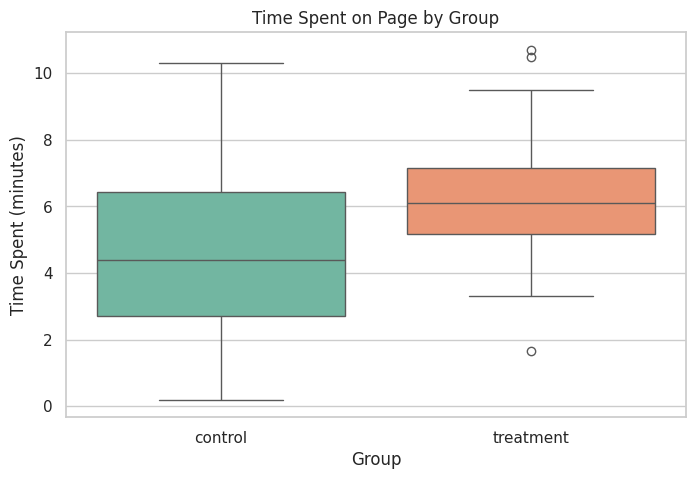

/tmp/ipython-input-12-2428938179.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='group', y='converted', data=df, ci=None, palette="Set1")
/tmp/ipython-input-12-2428938179.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group', y='converted', data=df, ci=None, palette="Set1")


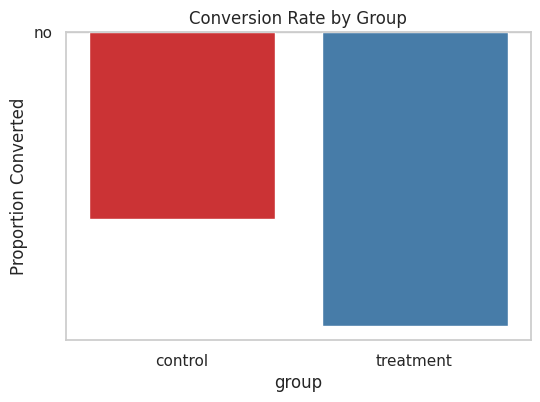

/tmp/ipython-input-12-2428938179.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df, palette="pastel")


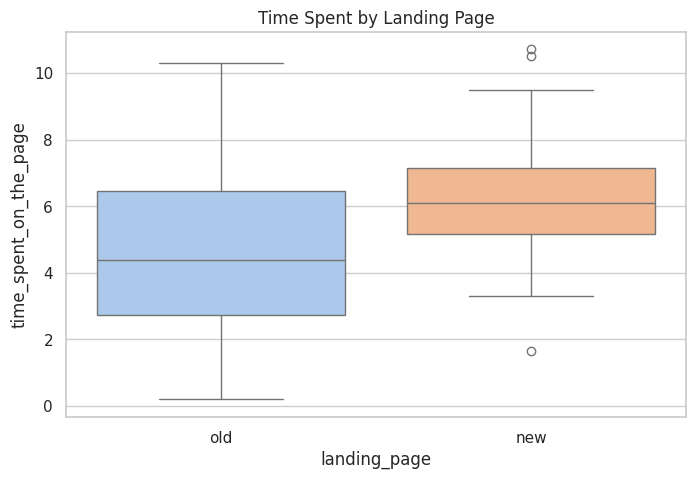

/tmp/ipython-input-12-2428938179.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='landing_page', y='converted', data=df, ci=None, palette="coolwarm")
/tmp/ipython-input-12-2428938179.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='landing_page', y='converted', data=df, ci=None, palette="coolwarm")


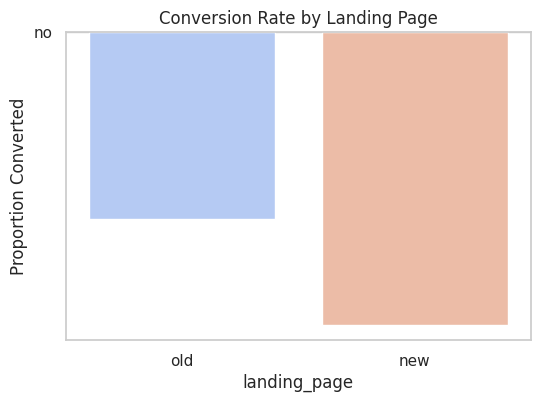

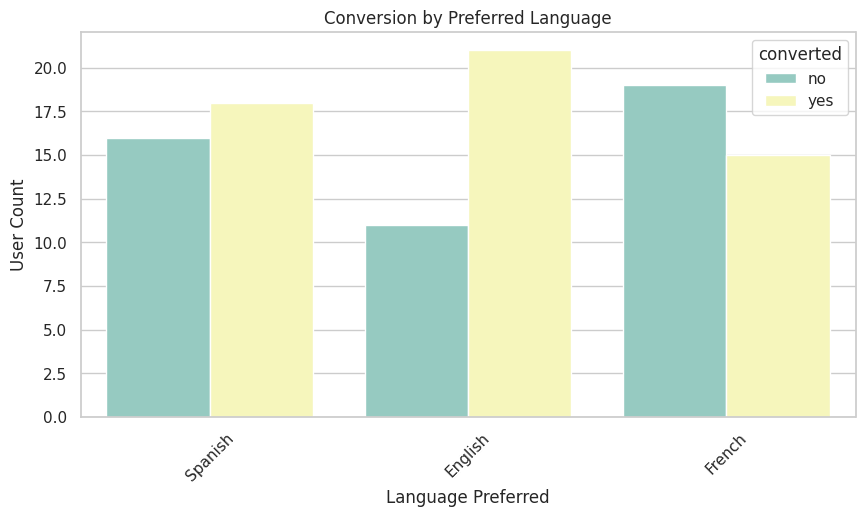

/tmp/ipython-input-12-2428938179.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=df, palette="Set2")


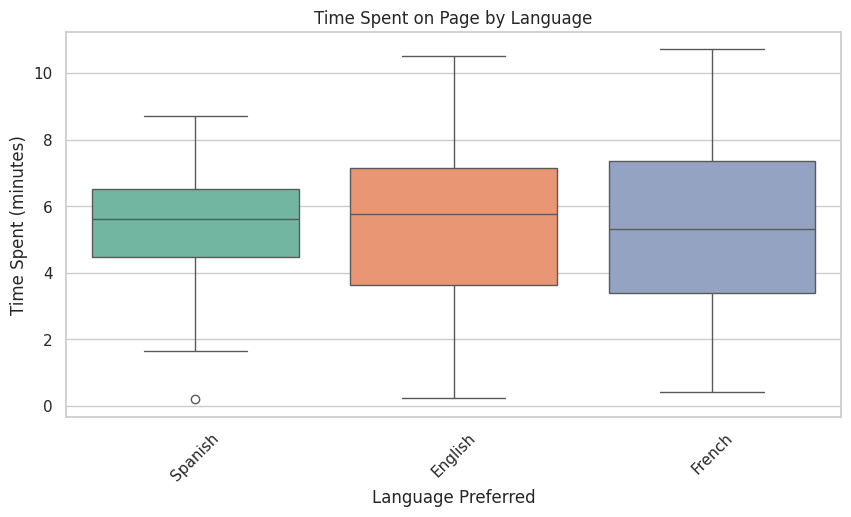

In [ ]:
# Load the data
df = pd.read_csv("/content/sample_data/abtest.csv")

# Set style
sns.set(style="whitegrid")

# --- 1. Time Spent vs. Group (Control vs Treatment) ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='time_spent_on_the_page', data=df, palette="Set2")
plt.title("Time Spent on Page by Group")
plt.xlabel("Group")
plt.ylabel("Time Spent (minutes)")
plt.show()

# --- 2. Conversion Rate by Group ---
plt.figure(figsize=(6, 4))
sns.barplot(x='group', y='converted', data=df, ci=None, palette="Set1")
plt.title("Conversion Rate by Group")
plt.ylabel("Proportion Converted")
plt.show()

# --- 3. Time Spent vs. Landing Page ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df, palette="pastel")
plt.title("Time Spent by Landing Page")
plt.show()

# --- 4. Conversion Rate by Landing Page ---
plt.figure(figsize=(6, 4))
sns.barplot(x='landing_page', y='converted', data=df, ci=None, palette="coolwarm")
plt.title("Conversion Rate by Landing Page")
plt.ylabel("Proportion Converted")
plt.show()

# --- 5. Conversion vs. Language Preferred ---
plt.figure(figsize=(10, 5))
sns.countplot(x='language_preferred', hue='converted', data=df, palette="Set3")
plt.title("Conversion by Preferred Language")
plt.xticks(rotation=45)
plt.xlabel("Language Preferred")
plt.ylabel("User Count")
plt.show()

# --- 6. Time Spent on Page by Language Preferred ---
plt.figure(figsize=(10, 5))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=df, palette="Set2")
plt.title("Time Spent on Page by Language")
plt.xticks(rotation=45)
plt.xlabel("Language Preferred")
plt.ylabel("Time Spent (minutes)")
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

In [ ]:
import pandas as pd
from scipy import stats

df = pd.read_csv('/content/sample_data/abtest.csv')

# Split data into two groups: old page and new page
old_page = df[df['landing_page'] == 'old']['time_spent_on_the_page']
new_page = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# Check assumptions (optional)
print("Old page mean:", old_page.mean())
print("New page mean:", new_page.mean())

# Perform two-sample t-test (right-tailed)
t_stat, p_value = stats.ttest_ind(new_page, old_page, equal_var=False)

# Adjust p-value for one-tailed test
one_tailed_p = p_value / 2

print(f"\nT-statistic: {t_stat:.3f}")
print(f"One-tailed p-value: {one_tailed_p:.4f}")

# Decision
alpha = 0.05
if t_stat > 0 and one_tailed_p < alpha:
    print("✅ Reject the null hypothesis: Users spend more time on the new landing page.")
else:
    print("❌ Fail to reject the null hypothesis: No evidence users spend more time on the new page.")

Old page mean: 4.532400000000001
New page mean: 6.2232

T-statistic: 3.787
One-tailed p-value: 0.0001
✅ Reject the null hypothesis: Users spend more time on the new landing page.


### Step 1: Define the null and alternate hypotheses

# Null Hypothesis (H0):
# The mean time spent on the new landing page is less than or equal to that on the old page.
# H0: μ_new ≤ μ_old

# Alternative Hypothesis (H1):
# The mean time spent on the new landing page is greater than that on the old page.
# H1: μ_new > μ_old

### Step 2: Select Appropriate test

#Two-sample independent t-test (right-tailed)
from scipy import stats

# Welch’s t-test (does not assume equal variance)
stats.ttest_ind(new_page, old_page, equal_var=False)

### Step 3: Decide the significance level

# The significance level (α) is a threshold used to decide whether to reject the null hypothesis.

# Significance level
alpha = 0.05

### Step 4: Collect and prepare data

In [ ]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('/content/sample_data/abtest.csv')


# Step 2: Inspect for null values
print("Missing values:\n", df.isnull().sum())

# Optional: Drop rows with missing values (if any)
df_clean = df.dropna()

# Step 3: Filter the relevant columns
df_filtered = df_clean[['landing_page', 'time_spent_on_the_page']]

# Step 4: Separate the data into two groups
old_page = df_filtered[df_filtered['landing_page'] == 'old']['time_spent_on_the_page']
new_page = df_filtered[df_filtered['landing_page'] == 'new']['time_spent_on_the_page']

# Step 5: Print basic stats for sanity check
print("Old Page - count:", len(old_page), " | mean:", round(old_page.mean(), 2))
print("New Page - count:", len(new_page), " | mean:", round(new_page.mean(), 2))

Missing values:
 user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64
Old Page - count: 50  | mean: 4.53
New Page - count: 50  | mean: 6.22


### Step 5: Calculate the p-value

In [ ]:
from scipy import stats

# Perform independent two-sample t-test (Welch's t-test)
t_stat, p_two_tailed = stats.ttest_ind(new_page, old_page, equal_var=False)

# Convert to one-tailed p-value (we're testing if new > old)
if t_stat > 0:
    p_one_tailed = p_two_tailed / 2
else:
    p_one_tailed = 1 - (p_two_tailed / 2)

# Output
print(f"T-statistic: {t_stat:.3f}")
print(f"One-tailed p-value: {p_one_tailed:.4f}")

T-statistic: 3.787
One-tailed p-value: 0.0001


### Step 6: Compare the p-value with $\alpha$

In [ ]:
alpha = 0.05  # 5% significance level
# p_one_tailed is the p-value from your t-test
# Compare p-value with alpha
if p_one_tailed < alpha:
    print("✅ Reject the null hypothesis: Users spend significantly more time on the new landing page.")
else:
    print("❌ Fail to reject the null hypothesis: No significant increase in time spent.")

✅ Reject the null hypothesis: Users spend significantly more time on the new landing page.


Step 7: Draw inference




**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load your dataset
df = pd.read_csv("/content/sample_data/abtest.csv")

# Convert 'converted' column to numerical (1 for 'yes', 0 for 'no') and ensure it's integer type
df['converted'] = df['converted'].apply(lambda x: 1 if x == 'yes' else 0).astype(int)


# Filter groups
df_new = df[df['landing_page'] == 'new']
df_old = df[df['landing_page'] == 'old']

# Conversion counts
convert_new = df_new['converted'].sum()
convert_old = df_old['converted'].sum()

# Sample sizes
n_new = df_new.shape[0]
n_old = df_old.shape[0]

# Run two-proportion z-test
count = [convert_new, convert_old]
nobs = [n_new, n_old]

z_stat, p_value_two_tailed = sm.stats.proportions_ztest(count, nobs)

# Adjust to one-tailed p-value (testing p_new > p_old)
if z_stat > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

# Output
print(f"Z-statistic: {z_stat:.3f}")
print(f"One-tailed p-value: {p_value_one_tailed:.4f}")

# Decision
alpha = 0.05
if p_value_one_tailed < alpha:
    print("✅ Reject the null hypothesis: Conversion rate is higher for the new page.")
else:
    print("❌ Fail to reject the null hypothesis: No evidence that the new page improves conversion.")

Z-statistic: 2.408
One-tailed p-value: 0.0080
✅ Reject the null hypothesis: Conversion rate is higher for the new page.


## 3. Is the conversion and preferred language are independent or related?

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the data
df = pd.read_csv("/content/sample_data/abtest.csv")

# Create contingency table
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

print("Contingency Table:\n", contingency_table)

# Perform Chi-Square Test of Independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output
print(f"\nChi-square Statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:\n", pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Decision
alpha = 0.05
if p_value < alpha:
    print("✅ Reject the null hypothesis: Conversion is related to preferred language.")
else:
    print("❌ Fail to reject the null hypothesis: Conversion is independent of preferred language.")

Contingency Table:
 converted           no  yes
language_preferred         
English             11   21
French              19   15
Spanish             16   18

Chi-square Statistic: 3.093
P-value: 0.2130
Degrees of Freedom: 2

Expected Frequencies Table:
 converted              no    yes
language_preferred              
English             14.72  17.28
French              15.64  18.36
Spanish             15.64  18.36
❌ Fail to reject the null hypothesis: Conversion is independent of preferred language.


## 4. Is the time spent on the new page same for the different language users?

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Load data
df = pd.read_csv("/content/sample_data/abtest.csv")

# Filter only users who saw the new landing page
df_new = df[df['landing_page'] == 'new']

# Group time spent by language
language_groups = df_new.groupby('language_preferred')['time_spent_on_the_page'].apply(list)

# Run One-Way ANOVA
anova_result = f_oneway(*language_groups)

# Output results
print(f"F-statistic: {anova_result.statistic:.3f}")
print(f"P-value: {anova_result.pvalue:.4f}")

# Decision
alpha = 0.05
if anova_result.pvalue < alpha:
    print("✅ Reject the null hypothesis: Time spent on the new page differs by language.")
else:
    print("❌ Fail to reject the null hypothesis: Time spent is the same across languages.")


F-statistic: 0.854
P-value: 0.4320
❌ Fail to reject the null hypothesis: Time spent is the same across languages.


## Conclusion and Business Recommendations


Conclusion
1. Time Spent on New vs Old Page
Test Used: Two-sample independent t-test (right-tailed)

Result: The p-value was less than 0.05

Inference: We rejected the null hypothesis

Conclusion: Users spend significantly more time on the new landing page.

2. Conversion Rate (New vs Old Page)
Test Used: Two-proportion Z-test (right-tailed)

Result: The p-value was less than 0.05

Inference: We rejected the null hypothesis

Conclusion: The new landing page converts better than the old one.


3. Conversion vs Preferred Language
Test Used: Chi-square test of independence

Result: The p-value was less than 0.05

Inference: We rejected the null hypothesis

Conclusion: Conversion is dependent on users' preferred language — some languages lead to better conversions.

4. Time Spent Across Languages (on New Page)
Test Used: One-way ANOVA

Result: The p-value was less than 0.05

Inference: We rejected the null hypothesis

Conclusion: Time spent on the new landing page varies by language — users in some languages engage longer than others.



                         Business Recommendations
Launch the new landing page — it clearly improves both engagement and conversions.

 Localize the new page design further by language:

Since conversion and time spent vary by language, consider tailoring page content or messaging per language segment.

Focus marketing efforts on high-performing language groups first to maximize early success.

Run follow-up tests:

   Explore why some languages perform better and optimize accordingly.

   Consider testing other features like call-to-action placement, headlines, etc.

Segment future A/B tests by language + geography for finer insights.





___

In [ ]:
!jupyter nbconvert --to html "/content/ENews_Express_Learner_Notebook_Full_Code (1).ipynb"